In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

import pickle
with open('/kaggle/input/pca-processed-uci/pca-processed-uci.pkl', 'rb') as f:
    df=pickle.load(f)

In [29]:
x = df.drop("target", axis=1) 
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
y = df["target"] 



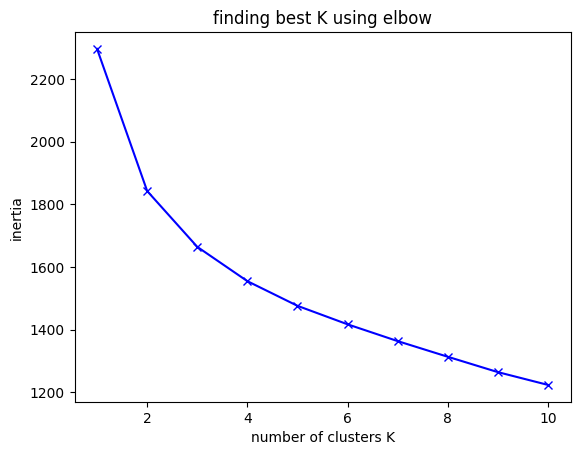

In [30]:
inertia=[]

K_s=range(1,11)

for k in K_s:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(K_s,inertia, 'bx-')
plt.xlabel('number of clusters K')
plt.ylabel('inertia')
plt.title('finding best K using elbow')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x)

df["cluster"] = clusters

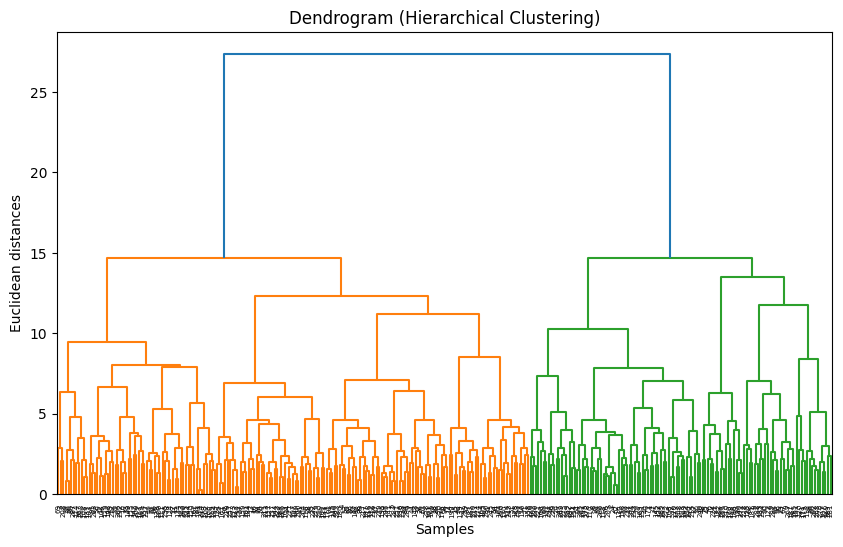

In [32]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score

# clusters = نتايج KMeans (0 أو 1)
# y = التارجت الحقيقي (0 أو 1)

mapped = np.zeros_like(clusters)   # نجهز array بنفس حجم clusters
for c in [0, 1]:
    # نشوف جوه الكلاستر ده أكتر ناس من انهي class
    majority_label = np.bincount(y[clusters == c]).argmax()
    mapped[clusters == c] = majority_label

# نحسب ال accuracy بعد ال remap
print("Mapped Accuracy:", accuracy_score(y, mapped))


Mapped Accuracy: 0.7542087542087542


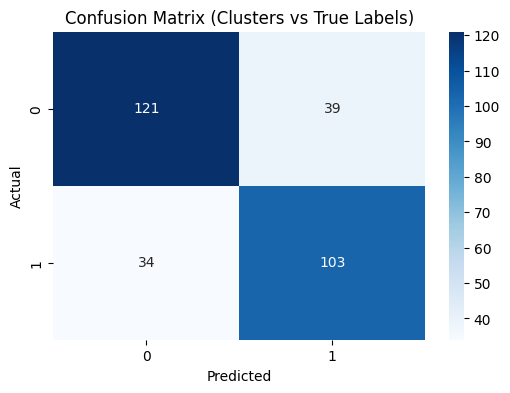

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y, mapped) 


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Clusters vs True Labels)")
plt.show()


In [38]:
from sklearn.metrics import silhouette_score


score = silhouette_score(x, mapped)
print("Silhouette Score:", score)


Silhouette Score: 0.1822849382975929


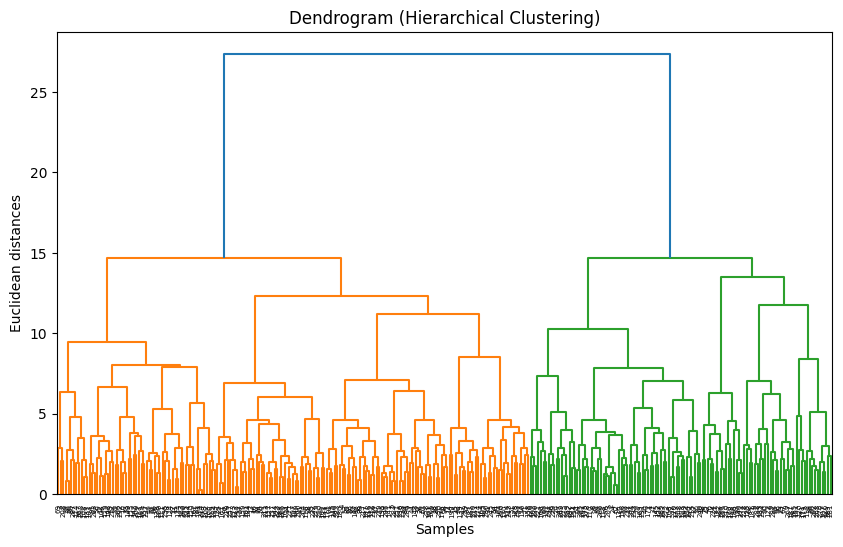

In [39]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()
